# Analysis of Stack Overflow 2018 Survey

In this project, we will explore some interesting questions about Stack Overflow 2018 survey. The analysis will follow the CRISP-DM process which consists of:

- Business Understanding
- Data Understanding
- Data Preparation
- Modeling
- Evaluation
- Deployment


# Business Understanding
Based on the survey questions, I came up with 3 questions each with a different target audience:
1. How do developers evaluate a job opportunity?
2. Do developers working in small and large companies have the same career goals?
3. Does a developer's age affect how they view AI risks?

# Data Understanding
This section will be divided into three parts to address our initial 3 questions.

#### Part 1: How do developers evaluate a job opportunity?
The SO survey contains 10 columns of different criteria for job assessment that participants were asked to rank based on order of importance. Let's have a look at the schema for these columns: 


In [2]:
# First, import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load data and schema
df = pd.read_csv("survey_results_public.csv", delimiter=",")
schema = pd.read_csv("survey_results_schema.csv", delimiter=",")

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Explore the definition of the 10 columns for evaluating job opportunities
pd.set_option('display.max_colwidth', -1)
schema[(schema.Column == "AssessJob1") | (schema.Column == "AssessJob2") | (schema.Column == "AssessJob3") |
       (schema.Column == "AssessJob4") | (schema.Column == "AssessJob5") | (schema.Column == "AssessJob6") |
       (schema.Column == "AssessJob7") | (schema.Column == "AssessJob8") | (schema.Column == "AssessJob9") |
       (schema.Column == "AssessJob10")]

,Column,QuestionText
17,AssessJob1,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The industry that I'd be working in"
18,AssessJob2,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The financial performance or funding status of the company or organization"
19,AssessJob3,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The specific department or team I'd be working on"
20,AssessJob4,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The languages, frameworks, and other technologies I'd be working with"
21,AssessJob5,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The compensation and benefits offered"
22,AssessJob6,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The office environment or company culture"
23,AssessJob7,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The opportunity to work from home/remotely"
24,AssessJob8,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. Opportunities for professional development"
25,AssessJob9,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. The diversity of the company or organization"
26,AssessJob10,"Imagine that you are assessing a potential job opportunity. Please rank the following aspects of the job opportunity in order of importance (by dragging the choices up and down), where 1 is the most important and 10 is the least important. How widely used or impactful the product or service I'd be working on is"


These 10 variables have similar names so it would be much easier to create a function that returns their names instead of manually typing them.

In [5]:
def getIncrementedColumnNames(name, count):
    '''
    INPUT - name - string - variable base name 
            count - int - number of variable names to be created
    OUTPUT - 
            variableNameList - string array - incremented list of the passed variable name 
    EXAMPLE -
    getRankColumnNames("Test", 5) will return this list:
    ["Test1", "Test2", "Test3", "Test4", "Test5"]
    '''
    columns = []
    for i in range(1, count + 1):
        columns.append(name + str(i))
    return columns

In [6]:
assessJobColumns = getIncrementedColumnNames("AssessJob", 10)
assessJobColumns

['AssessJob1',
 'AssessJob2',
 'AssessJob3',
 'AssessJob4',
 'AssessJob5',
 'AssessJob6',
 'AssessJob7',
 'AssessJob8',
 'AssessJob9',
 'AssessJob10']

In [7]:
# Time to explore
df[assessJobColumns].head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10
0,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0
1,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0


In [8]:
df[assessJobColumns].describe()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10
count,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000
mean,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,6.057804
std,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,2.663405
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,4.000000
50%,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,6.000000
75%,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,8.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Even though we observe some missing values, since all 10 variables have the same count we wouldn't have to deal with missing values. Having the same count implies that for any row either all values are missing at the same time or all are valid.  

#### Part 2: Do developers working in small and large companies have the same career goals?

In [23]:
df[['HopeFiveYears', 'CompanySize']].describe()

,HopeFiveYears,CompanySize
count,75718,71531
unique,7,8
top,Working in a different or more specialized technical role than the one I'm in now,20 to 99 employees
freq,25643,16996


In [11]:
df['HopeFiveYears'].value_counts()

Working in a different or more specialized technical role than the one I'm in now    25643
Working as a founder or co-founder of my own company                                 19444
Doing the same work                                                                  14724
Working as an engineering manager or other functional manager                        7483 
Working as a product manager or project manager                                      5004 
Working in a career completely unrelated to software development                     2151 
Retirement                                                                           1269 
Name: HopeFiveYears, dtype: int64

In [12]:
df['CompanySize'].value_counts()

20 to 99 employees          16996
100 to 499 employees        14011
10,000 or more employees    9757 
10 to 19 employees          8007 
1,000 to 4,999 employees    7634 
Fewer than 10 employees     7479 
500 to 999 employees        4630 
5,000 to 9,999 employees    3017 
Name: CompanySize, dtype: int64

Both variables we are interested in are categorical. In the next section, we would need to map these values to shorter labels for better readability.

#### Part 3: Does a developer's age affect how they view AI risks?

In [24]:
df[['Age', 'AIDangerous']].describe()

,Age,AIDangerous
count,64574,63115
unique,7,4
top,25 - 34 years old,Algorithms making important decisions
freq,31759,18020


In [25]:
df['Age'].value_counts()

25 - 34 years old     31759
18 - 24 years old     15249
35 - 44 years old     11477
45 - 54 years old     3313 
Under 18 years old    1638 
55 - 64 years old     959  
65 years or older     179  
Name: Age, dtype: int64

In [26]:
df['AIDangerous'].value_counts()

Algorithms making important decisions                                        18020
Artificial intelligence surpassing human intelligence ("the singularity")    17645
Evolving definitions of "fairness" in algorithmic versus human decisions     14958
Increasing automation of jobs                                                12492
Name: AIDangerous, dtype: int64

As discussed in Part 2, we need to map these values to easier labels.

# Data Preparation
Part 1 data are almost ready, we will only need to define a label index for the 10 columns. Similarly for Part 2 & 3, we will define a dictionary for mapping values with new labels.

#### Part 1

In [61]:
# See columns before labeling
df[assessJobColumns].head()

,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10
0,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0
1,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0


In [62]:
jobSelectionColumns = ['Industry', 'Company Financial', 'Department or Team', 'Framework/Technologies', 'Compensation/Benefits', 'Company Culture', 'Working Remotely', 'Professional Development', 'Diversity', 'Product Impact'] 
jobDf = df[assessJobColumns].set_axis(jobSelectionColumns, axis=1, inplace=False)

In [63]:
# After labeling
jobDf.head()

,Industry,Company Financial,Department or Team,Framework/Technologies,Compensation/Benefits,Company Culture,Working Remotely,Professional Development,Diversity,Product Impact
0,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0
1,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0


#### Part 2

In [75]:
HopeDf = df.copy()

# Rename "HopeFiveYears" and "CompanySize" values to make them shorter
hopeFiveYearsNewValues = {"Working as a founder or co-founder of my own company": "Becoming a Founder/CEO",
"Working in a different or more specialized technical role than the one I'm in now": "Working in different/more technical role",
"Doing the same work": "Doing same work",
"Working as a product manager or project manager": "Becoming a product/project manager",
"Working as an engineering manager or other functional manager": "Becoming an engineering manager",
"Working in a career completely unrelated to software development": "Changing career",
"Retirement": "Retirement"}
companySizeNewValues = {"Fewer than 10 employees": "<10",
"10 to 19 employees": "10-19",
"20 to 99 employees": "20-99",
"100 to 499 employees": "100-499",
"500 to 999 employees": "500-999",
"1,000 to 4,999 employees": "1000-4999",
"5,000 to 9,999 employees": "5000-9999",
"10,000 or more employees": ">10000"}

HopeDf['HopeFiveYears'] = HopeDf['HopeFiveYears'].map(hopeFiveYearsNewValues)
HopeDf['CompanySize'] = HopeDf['CompanySize'].map(companySizeNewValues)

# Force a custom order for the CompanySize column. Otherwise, results will be sorted alphabetically 
HopeDf['CompanySize'] = pd.Categorical(HopeDf['CompanySize'], categories=
    ['<10', '10-19', '20-99', '100-499', '500-999', '1000-4999', '5000-9999', '>10000'],
    ordered=True)

#### Part 3

In [65]:
AIDf = df.copy()

# Rename "age" and "AIDangerous" values to make them shorter
AIDangerousNewValues = {"Artificial intelligence surpassing human intelligence (\"the singularity\")": "The Singularity",
"Evolving definitions of \"fairness\" in algorithmic versus human decisions": "Fairness",
"Algorithms making important decisions": "Decision Making",
"Increasing automation of jobs": "Automation"}
ageNewValues = {"Under 18 years old": " (<18)",
"18 - 24 years old": "(18-24)",
"25 - 34 years old": "(25-34)",
"35 - 44 years old": "(35-44)",
"45 - 54 years old": "(45-54)",
"55 - 64 years old": "(55-64)",
"65 years or older": "(>65)"}

AIDf['AIDangerous'] = AIDf['AIDangerous'].map(AIDangerousNewValues)
AIDf['Age'] = AIDf['Age'].map(ageNewValues)

# Modeling
Now, we are ready to perform the analysis to answer our three questions

### Part 1: How do developers evaluate a job opportunity?  

We are interested to find the most important variable that impact developers’ decision in the job hunting process. Let's analyze the 10 columns by counting the frequency at which participants chose a criterion as rank 1. Then, the most frequent criterion among these columns will be the answer to our question. 

In [70]:
# For each criterion, we want to get count of all possible values
assessJobResults = jobDf[jobSelectionColumns].apply(lambda s: s.value_counts(normalize=True))
assessJobResults

,Industry,Company Financial,Department or Team,Framework/Technologies,Compensation/Benefits,Company Culture,Working Remotely,Professional Development,Diversity,Product Impact
1.0,0.074360,0.034351,0.055147,0.172964,0.183071,0.136105,0.102590,0.159648,0.016451,0.065313
2.0,0.057834,0.046607,0.077614,0.169560,0.180175,0.138061,0.087288,0.148317,0.028484,0.066060
3.0,0.060760,0.058909,0.089528,0.153258,0.154184,0.140688,0.089378,0.143584,0.035500,0.074211
4.0,0.069195,0.072763,0.099112,0.127208,0.125177,0.139598,0.097186,0.133731,0.048503,0.087542
5.0,0.084735,0.094439,0.109696,0.102919,0.099127,0.124311,0.099306,0.116519,0.065462,0.103486
6.0,0.102127,0.117190,0.117847,0.081735,0.076271,0.103516,0.102739,0.093095,0.086631,0.118848
7.0,0.122206,0.135881,0.122878,0.065447,0.061715,0.078167,0.098530,0.074957,0.109845,0.130372
8.0,0.139718,0.147585,0.124326,0.052236,0.049668,0.060835,0.094962,0.060208,0.135851,0.134612
9.0,0.152273,0.151750,0.117370,0.042651,0.042174,0.049175,0.103441,0.043696,0.169456,0.128014
10.0,0.136792,0.140524,0.086482,0.032022,0.028439,0.029544,0.124580,0.026245,0.303814,0.091543


In [73]:
# Get the first row that contains rank 1 occurance for each criterion
assessJobFirstRank = assessJobResults.iloc[0]

# Sort results
assessJobFirstRank = assessJobFirstRank.sort_values(ascending=False)

assessJobFirstRank

Compensation/Benefits       0.183071
Framework/Technologies      0.172964
Professional Development    0.159648
Company Culture             0.136105
Working Remotely            0.102590
Industry                    0.074360
Product Impact              0.065313
Department or Team          0.055147
Company Financial           0.034351
Diversity                   0.016451
Name: 1.0, dtype: float64

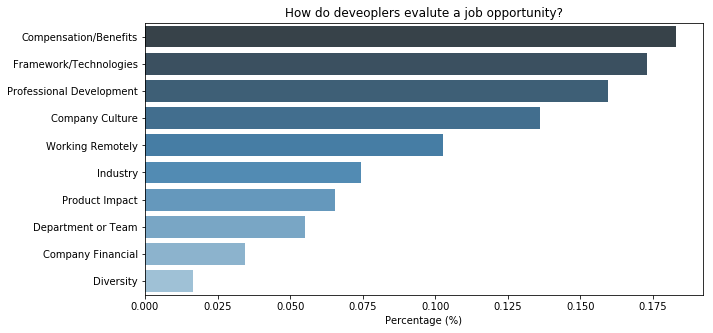

In [74]:
a4_dims = (10, 5)
fig, ax = plt.subplots(figsize=a4_dims)
jobPlot = sns.barplot(x = assessJobFirstRank.values, y = assessJobFirstRank.index, palette="Blues_d");
jobPlot.set(xlabel='Percentage (%)');
jobPlot.set_title("How do deveoplers evalute a job opportunity?");

Our analysis revealed that 18% of the survey respondents prioritized compensation and benefits over other aspects when evaluating a job opportunity. This finding has a huge business value for HR recruiters. Remarkably, the second in the list is the programming language and framework with almost 17% of the developers choosing this as their top criteria. 

Of course, this analysis can be improved further by segmenting the data (i.e. filtering by age, gender or other variables) in order to eliminate some of the biases. 

### Part 2: Do developers working in small and large companies have the same  career goals?  

In this part, we first group the dataframe by "CompanySize". Then, we find the value counts for "HopeFiveYears". Since the same task will be performed for the next part, we will create a function

In [80]:
# This function is helpful in analyzing whether two variables are correlated
def getCountForGroupedDf(df, groupByColumn, countColumn):
    '''
    INPUT - df - dataframe - pandas dataframe of the original dataset 
            groupByColumn - string - the name of the column you want to group by
            countColumn - string - the name of the column you want to count its values
    OUTPUT - 
            groupedDfCounts - dataframe - pandas dataframe with the value counts of the grouped dataframe
    '''
    valueCountsResults = df.groupby(groupByColumn)[countColumn].value_counts(normalize=True)
    groupedDfCounts = pd.DataFrame(data={'Percentage (%)': valueCountsResults.values}, index=valueCountsResults.index).reset_index()
    return groupedDfCounts

In [81]:
# Calcluate the frequency of each future goal response for every company size
HopeResultDf = getCountForGroupedDf(HopeDf, "CompanySize", "HopeFiveYears")
HopeResultDf.head()


,CompanySize,HopeFiveYears,Percentage (%)
0,<10,Becoming a Founder/CEO,0.299390
1,<10,Working in different/more technical role,0.291038
2,<10,Doing same work,0.217796
3,<10,Becoming a product/project manager,0.074366
4,<10,Becoming an engineering manager,0.067780


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


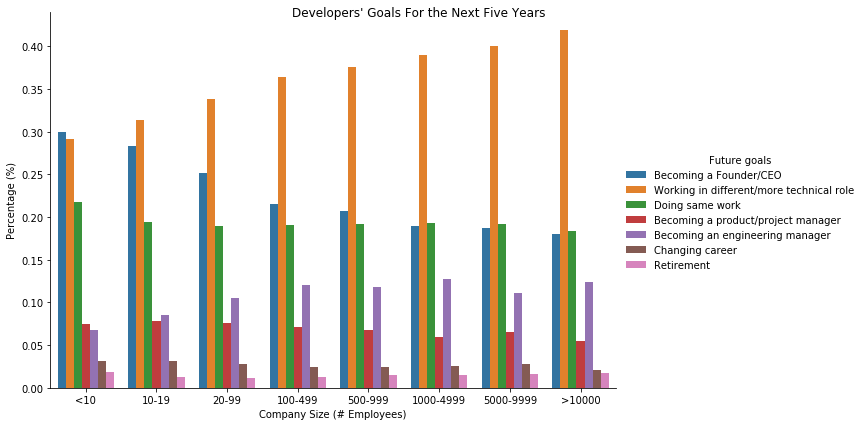

In [82]:
hopePlot = sns.catplot(x="CompanySize", y="Percentage (%)", hue="HopeFiveYears",
            kind="bar", data=HopeResultDf, size=6, aspect=1.5);
hopePlot.set(xlabel='Company Size (# Employees)');
hopePlot.fig.suptitle("Developers' Goals For the Next Five Years");
hopePlot._legend.set_title("Future goals")

The most apparent correlation with the company size are shown in the following goals:
- Becoming a CEO (Blue)
- Working in a different or more technical role (Orange)
- Doing same work (Green)

Note, my definition of a small company is a one with less than 100 employees while a large company's size is more than 1000 employees.

It appears that 25-30% of developers in small companies dream of starting their own companies compared to 16–18% of developers in large companies. On the other hand, more than 35% of developers in large companies are looking for a different role.

### Part 3: Does a developer's age affect how they view AI risks?

In [83]:
# We want to see how each age group view AI risks. Let's calcluate the frequency of each AI risk response for every age group.
AIResultDf = getCountForGroupedDf(AIDf, "Age", "AIDangerous")
AIResultDf.head()

,Age,AIDangerous,Percentage (%)
0,(<18),The Singularity,0.391724
1,(<18),Automation,0.249655
2,(<18),Decision Making,0.198621
3,(<18),Fairness,0.160000
4,(18-24),The Singularity,0.316417


C:\Anaconda3\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


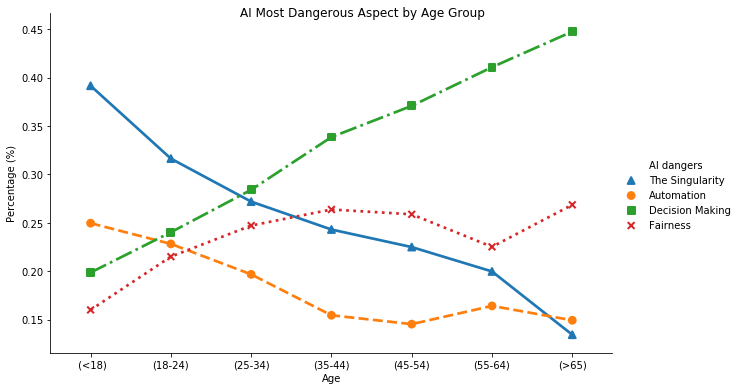

In [84]:
AIPlot = sns.catplot(x="Age", y="Percentage (%)", hue="AIDangerous",
            markers=["^", "o", "s", "x"], linestyles=["-", "--", "-.", ":"],
            kind="point", data=AIResultDf, size=5.5, aspect=1.6);

AIPlot.fig.suptitle("AI Most Dangerous Aspect by Age Group")
AIPlot._legend.set_title("AI dangers")

The chart above shows that most young developers feared singularity the most. Surprisingly, this fear is diminishing among senior developers and is shifting toward decision making. Perhaps, senior developers have experience in management and leadership which allows them to appreciate the importance of decision making.